In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp
%matplotlib inline

### Load in 90-10 and 70-30 data

In [8]:
columns = ['Elapsed Time (s)','Since last trial (s)','Trial Duration (s)','Port Poked','Right Reward Prob','Left Reward Prob','Reward Given']

In [9]:
df_90 = pd.read_csv('data/trials_90_10.csv',names=columns)
df_70 = pd.read_csv('data/trials_70_30.csv',names=columns)

In [10]:
df_90.head(5)

,Elapsed Time (s),Since last trial (s),Trial Duration (s),Port Poked,Right Reward Prob,Left Reward Prob,Reward Given
0,0.891,0.000,0.891,1,0.9,0.1,1
1,6.640,1.523,0.540,1,0.9,0.1,1
2,8.708,1.714,0.354,1,0.9,0.1,1
3,11.230,2.035,0.487,1,0.9,0.1,1
4,13.759,2.090,0.439,1,0.9,0.1,1


In [11]:
df_70.head(5)

,Elapsed Time (s),Since last trial (s),Trial Duration (s),Port Poked,Right Reward Prob,Left Reward Prob,Reward Given
0,22.024,1.478,0.346,2,0.3,0.7,1
1,24.812,2.287,0.501,2,0.3,0.7,0
2,31.390,5.923,0.655,2,0.3,0.7,1
3,33.180,1.441,0.349,2,0.3,0.7,0
4,35.288,1.670,0.438,1,0.3,0.7,0


## Useful variables

In [12]:
n_trials_90 = df_90.shape[0]
n_trials_70 = df_70.shape[0]

## Accuracy

accuracy is defined as the fraction of times the mouse chose the higher rewarded port

## 90-10 data

In [93]:
right_high = df_90['Right Reward Prob'] > df_90['Left Reward Prob']
right_high_choice = np.sum(df_90[right_high]['Port Poked'] == 1)

left_high = df_90['Right Reward Prob'] < df_90['Left Reward Prob']
left_high_choice = np.sum(df_90[left_high]['Port Poked'] == 2)

acc90 = (left_high_choice + right_high_choice) / n_trials_90

In [89]:
right_low = df_90['Right Reward Prob'] > df_90['Left Reward Prob']
right_low_choice = np.sum(df_90[right_low]['Port Poked'] == 2)

left_low = df_90['Right Reward Prob'] < df_90['Left Reward Prob']
left_low_choice = np.sum(df_90[left_low]['Port Poked'] == 1)

(left_low_choice + right_low_choice) / n_trials_90

0.10309278350515463

## 70-30 data

In [99]:
right_high = df_70['Right Reward Prob'] > df_70['Left Reward Prob']
right_high_choice = np.sum(df_70[right_high]['Port Poked'] == 1)

left_high = df_70['Right Reward Prob'] < df_70['Left Reward Prob']
left_high_choice = np.sum(df_70[left_high]['Port Poked'] == 2)

acc70 = (left_high_choice + right_high_choice) / n_trials_70

In [92]:
right_low = df_70['Right Reward Prob'] > df_70['Left Reward Prob']
right_low_choice = np.sum(df_70[right_low]['Port Poked'] == 2)

left_low = df_70['Right Reward Prob'] < df_70['Left Reward Prob']
left_low_choice = np.sum(df_70[left_low]['Port Poked'] == 1)

(left_low_choice + right_low_choice) / n_trials_70

In [85]:
right_low_choice

220

(0.5, 1)

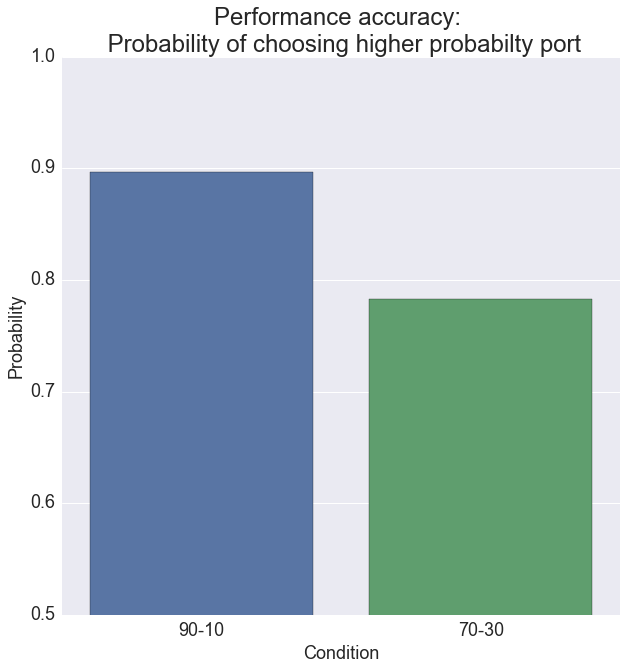

In [109]:
plt.figure(figsize=(10,10))
sns.barplot(x = ['90-10','70-30'],y = [acc90,acc70],)
plt.title('Performance accuracy: \n Probability of choosing higher probabilty port',fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Probability',fontsize=18)
plt.xlabel('Condition',fontsize=18)
plt.ylim(0.5,1)


## Distributions of time since last trial based on previous reward outcome
    - after rewarded trials
    - after non-rewarded trials

In [41]:
#for 90_10 trials

after_nr = []
after_r = []
for trial in range(n_trials_90):
    if trial > 0:
        last_trial_reward = df_90.iloc[trial-1]['Reward Given']
        
        if last_trial_reward == 0:
            after_nr.append(df_90.iloc[trial]['Since last trial (s)'])
        else:
            after_r.append(df_90.iloc[trial]['Since last trial (s)'])

after_nr_90 = np.asarray(after_nr)
after_r_90 = np.asarray(after_r)

In [42]:
# for 70-30 trials
after_nr = []
after_r = []
for trial in range(n_trials_70):
    if trial > 0:
        last_trial_reward = df_70.iloc[trial-1]['Reward Given']
        
        if last_trial_reward == 0:
            after_nr.append(df_70.iloc[trial]['Since last trial (s)'])
        else:
            after_r.append(df_70.iloc[trial]['Since last trial (s)'])

after_nr_70 = np.asarray(after_nr)
after_r_70 = np.asarray(after_r)

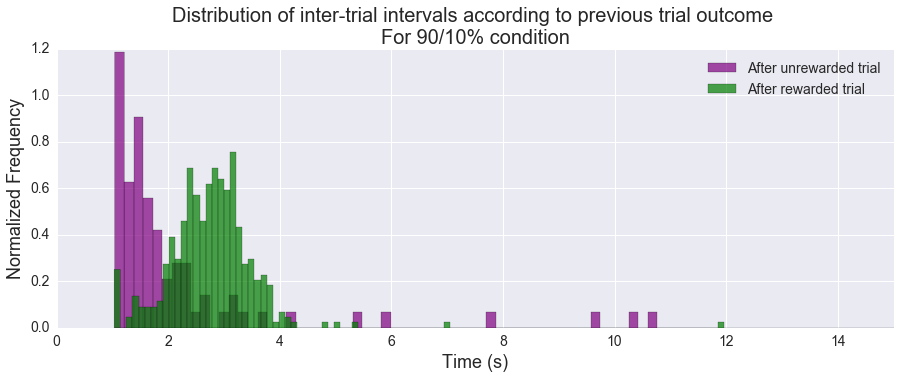

In [54]:
plt.figure(figsize=(15,5))
plt.hist(after_nr_90,color='purple',label='After unrewarded trial',bins=400,normed=True,alpha=0.7)
plt.hist(after_r_90,color='green',label='After rewarded trial',bins=100,normed=True,alpha=0.7)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribution of inter-trial intervals according to previous trial outcome \nFor 90/10% condition',fontsize=20)
plt.xlim(0,15)
plt.xlabel('Time (s)',fontsize=18)
plt.ylabel('Normalized Frequency',fontsize=18)
plt.legend(loc = 'upper right',fontsize = 14)

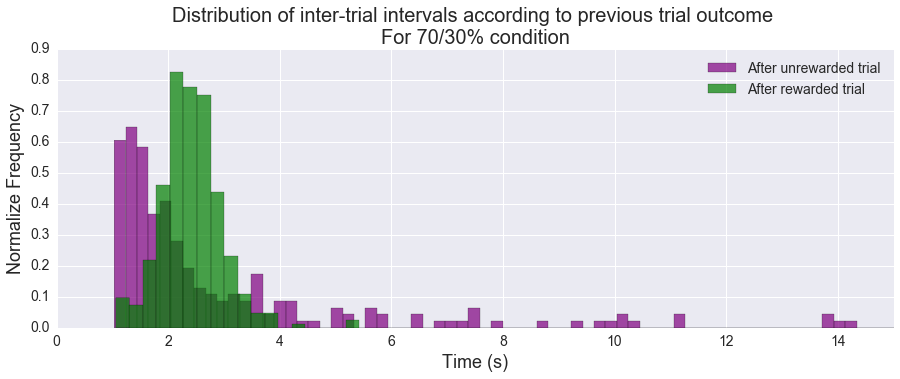

In [72]:
plt.figure(figsize=(15,5))
plt.hist(after_nr_70,color='purple',label='After unrewarded trial',bins=400,normed=True,alpha=0.7)
plt.hist(after_r_70,color='green',label='After rewarded trial',bins=100,normed=True,alpha=0.7)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribution of inter-trial intervals according to previous trial outcome \nFor 70/30% condition',fontsize=20)
plt.xlim(0,15)
plt.xlabel('Time (s)',fontsize=18)
plt.ylabel('Normalize Frequency',fontsize=18)
plt.legend(loc = 'upper right',fontsize = 14)

## Histogram of time since last trial based on future decision

is the next choice the same or different than the last one?

In [56]:
#for 90_10 trials
same_choice = []
different_choice = []

for trial in range(n_trials_90-1):
    
    if trial > 0:
        this_decision = df_90.iloc[trial]['Port Poked']
        last_decision = df_90.iloc[trial-1]['Port Poked']

        if (this_decision == last_decision):
            same_choice.append(df_90.iloc[trial]['Since last trial (s)'])
        else:
            different_choice.append(df_90.iloc[trial]['Since last trial (s)'])

        
different_90 = np.asarray(different_choice)
same_90 = np.asarray(same_choice)

In [64]:
#for 70_10 trials
same_choice = []
different_choice = []

for trial in range(n_trials_70):
    
    if trial > 0:
        this_decision = df_70.iloc[trial]['Port Poked']
        last_decision = df_70.iloc[trial-1]['Port Poked']

        if (this_decision == last_decision):
            same_choice.append(df_70.iloc[trial]['Since last trial (s)'])
        else:
            different_choice.append(df_70.iloc[trial]['Since last trial (s)'])

        
different_70 = np.asarray(different_choice)
same_70 = np.asarray(same_choice)

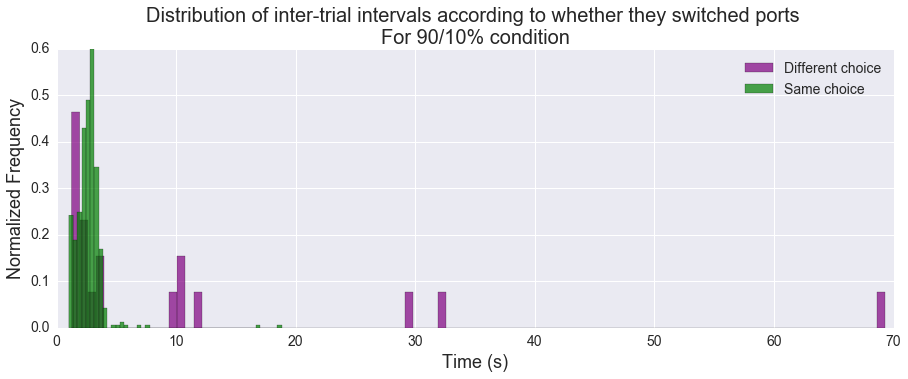

In [71]:
plt.figure(figsize=(15,5))
plt.hist(different_90,color='purple',label='Different choice',bins=100,normed=True,alpha=0.7)
plt.hist(same_90,color='green',label='Same choice',bins=50,normed=True,alpha=0.7)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribution of inter-trial intervals according to whether they switched ports \nFor 90/10% condition',fontsize=20)
#plt.xlim(0,15)
plt.xlabel('Time (s)',fontsize=18)
plt.ylabel('Normalized Frequency',fontsize=18)
plt.legend(loc = 'upper right',fontsize = 14)

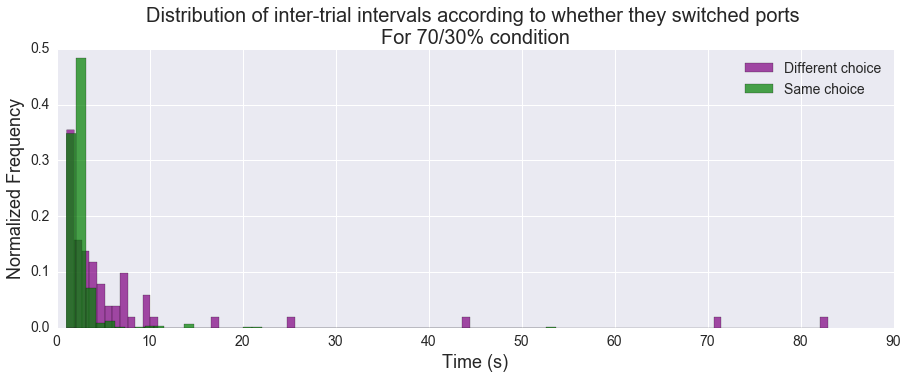

In [68]:
plt.figure(figsize=(15,5))
plt.hist(different_70,color='purple',label='Different choice',bins=100,normed=True,alpha=0.7)
plt.hist(same_70,color='green',label='Same choice',bins=50,normed=True,alpha=0.7)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribution of inter-trial intervals according to whether they switched ports \nFor 70/30% condition',fontsize=20)
#plt.xlim(0,15)
plt.xlabel('Time (s)',fontsize=18)
plt.ylabel('Normalized Frequency',fontsize=18)
plt.legend(loc = 'upper right',fontsize = 14)

## Errors

In [ ]:
for trial in n_trials_90